# HOW TO DETERMINE THE BEST ARIMA MODEL BASED ON TIME SERIES DATA?
## Concepts
### Time Series
There are two types of time series: univariate and multivariate. We will only concern on univariate time series here.
    
A univariate time series is sequential data from a metric produced by a process and is collected over time at regular time invervals.

Time series are analysed to:
* describe important features of the time series pattern
* explain how the past affects the future
* forecast new values of the series
* generate a baseline to compare with for a specific metric

Some important questions to first consider when first looking at a time series. These are basic questions to answer before deciding on whether the data to be analysed is indeed a time series: 

* Is there a trend, do the data values increase or decrease over time?
* Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
* Are there outliers? 
* Is there a long-run cycle or period unrelated to seasonality factors?
* Is there constant variance over time, or is the variance non-constant?
* Are there any abrupt changes to either the level of the series or the variance?

Penn State, Eberly College of Science. STAT 510 Applied Time Series Analysis: 1.1 Overview of Time Series Characteristics. https://libguides.murdoch.edu.au/APA/text

### Models
There are two types of models that can be used to analyse time series data
* Models that use the series past values and past prediction errors to explain the present values - these are called ARIMA models (for Autoregressive Integrated Moving Average). We’ll spend substantial time on these
* Ordinary regression models that use time indices as x-variables. Only useful for an initial description of the data 

Penn State, Eberly College of Science. STAT 510 Applied Time Series Analysis: 1.1 Overview of Time Series Characteristics. https://online.stat.psu.edu/stat510/lesson/1/1.1

### What are the ARIMA and SARIMA models?
ARIMA and SARIMA models are also referred to as Box-Jenkins modelsthat may possible include autoregressive, moving average terms, and differencing  operations. They are linear-regression models and these models work best when there is no correlation between the covariants used in it. 

The ARIMA annd SARIMA models have an order that indicates which terms and how many lags/residuals should used (lags, error of the lag, differencing) in order to remove unnecesary collinearity.

Penn State, Eberly College of Science. STAT 510 Applied Time Series Analysis: 3.1 Non-seasonal ARIMA Models.
https://online.stat.psu.edu/stat510/lesson/3/3.1


**ARIMA**, is an acronym that stands for **‘Auto Regressive Integrated Moving Average’** is actually a class of statistical models for analysing and forecasting times series data.  The model uses lag values (past values) and the lagged forecast errors (moving average),

An ARIMA model is characterized by 3 terms: p, d, q where,
* p is the number of lags included in the model, is also the order of the AR term
* d is the number of differencing (substracting an observation from the previous observation) required to make the time series stationary
* q is the size of moving average window, is also the order of the MA term

Jason Brownlee (2017). Time Series: How to Create an ARIMA Model for Time Series Forecasting in Python.
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

**SARIMA** 
If a time series, has **seasonal patterns**, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. M

Selva Prabhakaran. ARIMA Model – Complete Guide to Time Series Forecasting in Python. 
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

The ARMA model conceptual linear regression equation is:
Predicted Yt = Intercept + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

## Steps to build a SARIMA model
### Step 1
* Load the data and plot it, look for trend, seasonality, outliers and constant or non-constant variance

In [2]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#loading the CSV file
url = "Harmon_Foods.csv"
da = pd.read_csv(url, index_col = 0)

#quick glance at the data loaded in the pd
print(da.head(10),"\n")

#separating the Sales data in its own panda dataframe and exploring it
df = da['Sales'].dropna()
print(df.head(10),"\n")
da["DA"] = pd.to_numeric(da["DA"], errors='coerce')
da.dtypes


        Sales       CP         DA     SI
Month                                   
Jan-83    NaN      0.0  396776.00  113.0
Feb-83    NaN      0.0  152296.00   98.0
Mar-83    NaN      0.0  157640.00  102.0
Apr-83    NaN      0.0  246064.00  107.0
May-83    NaN  15012.0  335716.00  119.0
Jun-83    NaN  62337.0  326312.00  104.0
Jul-83    NaN   4022.0  263284.00  107.0
Aug-83    NaN   3130.0  488676.00   81.0
Sep-83    NaN    422.0   33928.00  113.0
Oct-83    NaN      0.0  224028.00   97.0 

Month
Jan-84    425075.0
Feb-84    315305.0
Mar-84    367286.0
Apr-84    429432.0
May-84    347874.0
Jun-84    435529.0
Jul-84    299403.0
Aug-84    296505.0
Sep-84    426701.0
Oct-84    329722.0
Name: Sales, dtype: float64 



Sales    float64
CP       float64
DA       float64
SI       float64
dtype: object

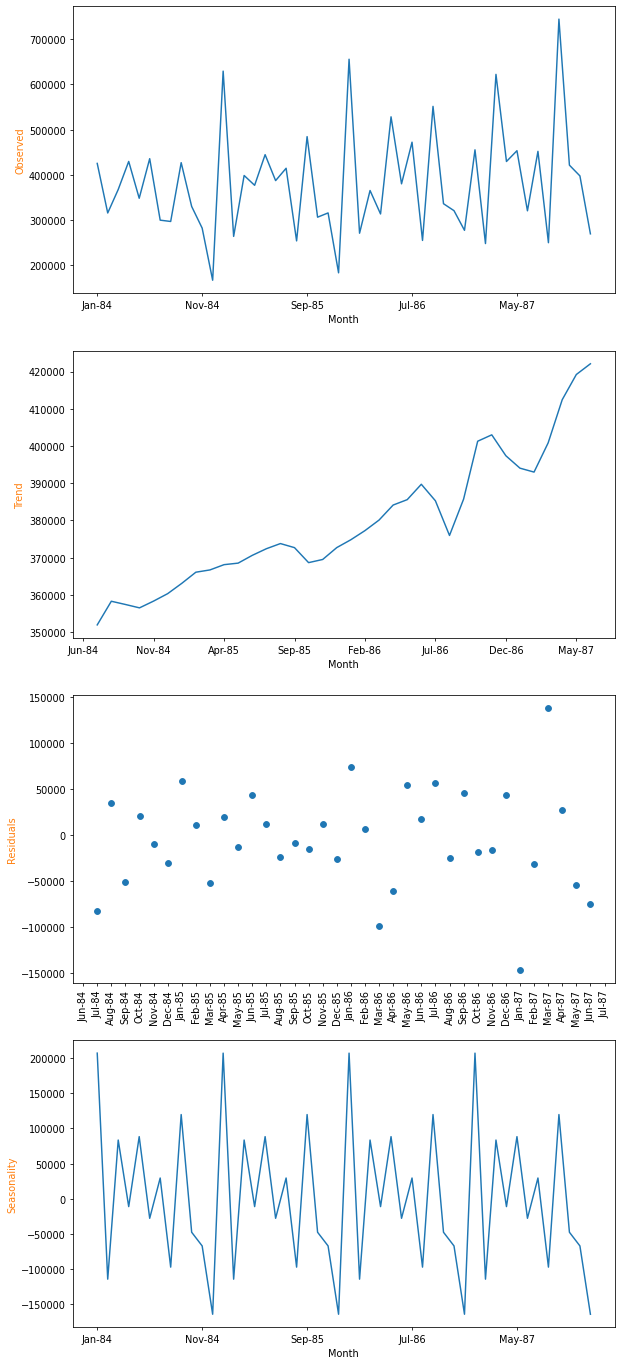

In [4]:
# Plotting the decomposed time series:
plt.rcParams.update({'figure.dpi':70})
decomposition = seasonal_decompose(df, period=12)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,25))
decomposition.observed.plot(ax=ax1)
decomposition.trend.plot(ax=ax2)
#decomposition.resid.plot(ax=ax3)
ax3.scatter(df.index,decomposition.resid)
ax3.tick_params(axis='x', labelrotation = 90)
decomposition.seasonal.plot(ax=ax4)
ax1.set_ylabel('Observed', color="C1")       
ax1.yaxis.set_label_position('left') 
ax2.set_ylabel('Trend', color="C1")       
ax2.yaxis.set_label_position('left') 
ax3.set_ylabel('Residuals', color="C1")       
ax3.yaxis.set_label_position('left') 
ax4.set_ylabel('Seasonality', color="C1")       
ax4.yaxis.set_label_position('left') 

#fig = decomposition.plot()
plt.show()

### Step2
* Check if the series is stationary
To do this we use the Augmented Dickey Fuller test 

Selva Prabhakaran. ARIMA Model – Complete Guide to Time Series Forecasting in Python: 5. How to find the order of differencing (d) in ARIMA model
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Pratik Gandhi, (Aug 10, 2020). 7 Statistical Tests to validate and help to fit ARIMA model:1. Augmented Dickey-Fuller (ADF) test:
<<https://towardsdatascience.com/7-statistical-tests-to-validate-and-help-to-fit-arima-model-33c5853e2e93>>

The test uses A/B testing with alpha = 0.5
     H0 - The series is non-stationary
     H1 - The series is stationary

* If the time series is stationary you do not need differencing

In [6]:
# Conducting ADF test:
p_value = adfuller(df)
print('ADF Statistic: %f' %p_value[0])
print('p-value: %f' %p_value[1])

ADF Statistic: -2.717038
p-value: 0.071136


The p value of 0.07 indicates the series may be non-stationary so it may need to be differentiated to make it stationary. The p value is very close to the alpha for a 95% confidence test

To confirm that differencing is needed we will difference it once and look at the AutoCorrelation plot. If autocorrelation values is 0 it means there is no need to differencing it and we can safely consider it stationary.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


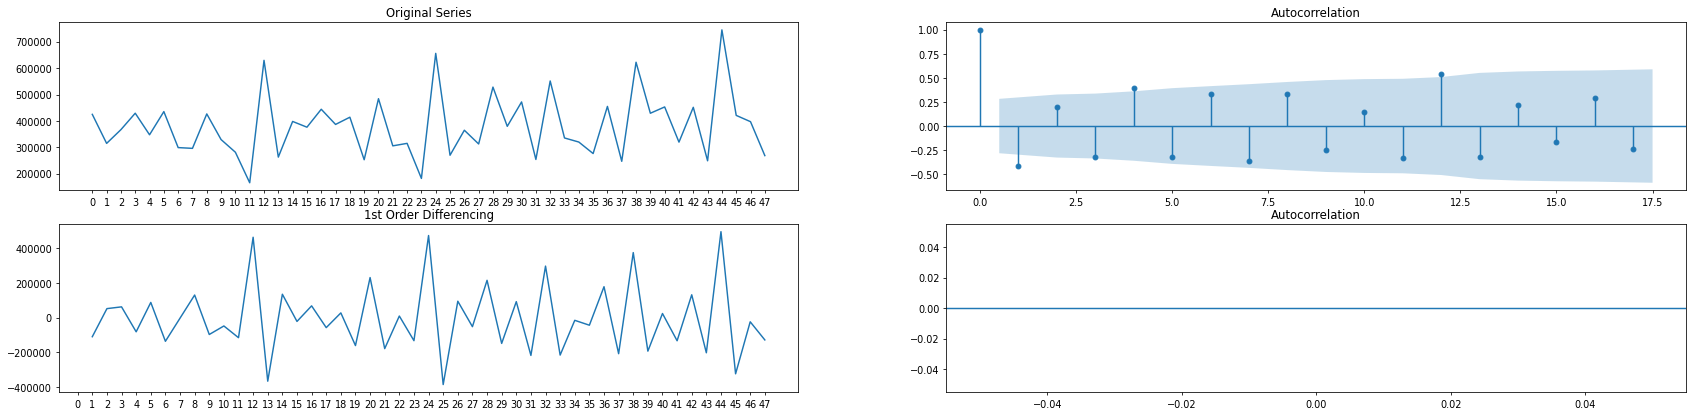

Autocorrelation for first differencing
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


In [9]:
# Original Series
fig, axes = plt.subplots(2, 2,figsize=(30,7))

#calling auto correlation function
lag_acf, confint = acf(df.diff(), nlags=len(df)-1, fft=False, alpha=0.5)

x_values = [i for i in range(len(lag_acf))]

axes[0,0].plot(df); axes[0,0].set_title('Original Series'); axes[0,0].set_xticklabels(x_values)
plot_acf(df, ax=axes[0,1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing'); axes[1,0].set_xticklabels(x_values)
plot_acf(df.diff(), ax=axes[1, 1])

plt.show()
print("Autocorrelation for first differencing\n", lag_acf)


**Since the ACF function is null for the first differencing we can safely assume that the model does not require differencing and is indeed stationary.**

**The d value of the SARIMA model is 0. d = 0**

### STEP 3


* Determine the q order of the MA term of the model we use the autocorrelation function (ACF).

Consider that the MA term is the error of the lagged forecast. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

The ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.The ACF function describes the correlation of the series' present value with its past values and to which ones. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

Jayesh Salvi (Mar 27, 2019).Significance of ACF and PACF Plots In Time Series Analysis
https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

The ACF values are plotted in the autocorrelation graph above along with the confidence intervals. 

**The graph shows that there is a high autocorrelation with the first lag and with the 12th lag which confirms the yearly seasonality we saw in the time series decomposition graph.** 

**From this graph we can propose to have the q value for the MA model as 1. p = 1**

### STEP 4

* Determine the p order of the AR part of the model with the the partial-autocorrelation function (PACF)

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Whilst modeeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

We cannot use the ACF plot here because it will show potentially good correlations even for the lags which are far in the past.  Considering all lags that potentially the ACF will report with good correlation will introduce multicollinearity issues to the model. Hence we need to use a PACF function as it removes components (seasonlaity, trend, cycle) already explained by earlier lags, so we only get the lags which have the correlation with the residual i.e the component not explained by earlier lags.


The final step is determining the value of the AR component of the model. This is done by inspecting the Partial Autocorrelation (PACF) plot. 
Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. 
So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

Jayesh Salvi (Mar 27, 2019).Significance of ACF and PACF Plots In Time Series Analysis
https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

**The graph shows that there is a high autocorrelation with the first and 12th lag only which indicates that the time series data has a good partial-autocorrelation that is meaningful between the lag and the last one's residual** 

**From this graph we can propose to have the p value for the AR model as 1. p = 1**

**The proposed ARIMA model would have the following order (1,0,1) and we will add the Seasonality as 12 to create a SARIMA model with order (1,0,1,12)**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


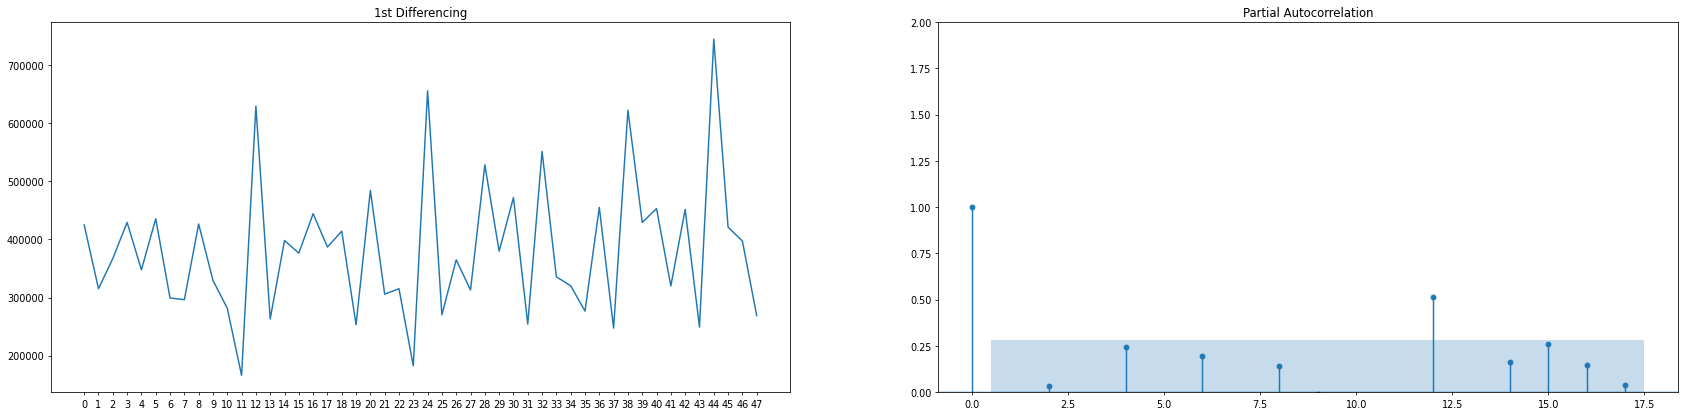

In [10]:
#Plotting the PACF
plt.rcParams.update({'figure.dpi':70})
fig, axes = plt.subplots(1, 2, figsize=(30,7))
axes[0].plot(df); axes[0].set_title('1st Differencing');axes[0].set_xticklabels(x_values)
axes[1].set(ylim=(0,2))
plot_pacf(df, ax=axes[1])

plt.show()

#calling partial correlation function
lag_pacf = pacf(df, nlags=len(df)/2 -1, method='ols')

### Step 5
* Test the assumptions by evaluating different ARIMA value sets and selecting the model with the least mean suqared error (MSE)

This is done by splitting the time series intoo train data (66% of the time series data) and test data to check that the model is able to forecast it accurately.
We then take the MSE and select the model with the lowest MSE. 

**From the models tested below the best one is an ARIMA(1,0,1) which confirms our previous proposal)***

In [12]:
#Finding the best model
p_values = [0, 1, 2]
d_values = range(0, 2) #this is the range for the values
q_values = range(0, 2) #this is the range for the values
warnings.filterwarnings("ignore")

def evaluate_arima_model(X, arima_order):
    # prepare training datasettrain_size = int(len(X) * 0.66)
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                #try:
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.3f' % (order,mse))
                #except:
                 #   continue
    print('\n Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
evaluate_models(df, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=19607445122.717
ARIMA(0, 0, 1) MSE=18633428912.306
ARIMA(0, 1, 0) MSE=51746293580.118
ARIMA(0, 1, 1) MSE=20267612672.104
ARIMA(1, 0, 0) MSE=18221174931.682
ARIMA(1, 0, 1) MSE=16919346742.246
ARIMA(1, 1, 0) MSE=24958966894.609
ARIMA(1, 1, 1) MSE=18157771386.681
ARIMA(2, 0, 0) MSE=18634886092.564
ARIMA(2, 0, 1) MSE=20095245345.693
ARIMA(2, 1, 0) MSE=26114703864.157
ARIMA(2, 1, 1) MSE=18739219194.569

 Best ARIMA(1, 0, 1) MSE=16919346742.246


### Step 6

* Use the SARIMA model with order (1,0,1,12)
* Include the following covariants:

    Covariants:
    -  x1 = Consumer Packs
    -  x2 = Dealer Allowances
    -  x3 = Seasonality Index

In [7]:
exogenous = np.asarray(da[12:len(da)][['CP','DA','SI']].fillna(value=0))
exogenous.shape
df.shape
model = ARIMA(df, seasonal_order=(1,0,1,12), exog = exogenous )
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                   48
Model:             ARIMA(1, 0, [1], 12)   Log Likelihood                -578.895
Date:                  Thu, 18 Mar 2021   AIC                           1171.790
Time:                          16:03:45   BIC                           1184.888
Sample:                      01-01-1984   HQIC                          1176.740
                           - 12-01-1987                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.683e+04   6.73e+04     -1.141      0.254   -2.09e+05    5.51e+04
x1             0.3993      0.060      6.676      0.000       0.282       0.517
x2             0.0765      0.016    

**The best performing model found has both seasonal and non-seasonal moving average processes (AR and MA) and is a stationary series.**

**From the summary above:**

**- all coefficients are significant significance value of 0.5**

**- with the possible exception of the AR process covariant**

### Step 7

- Review the residuals
- Plot the actuals vs fitted values

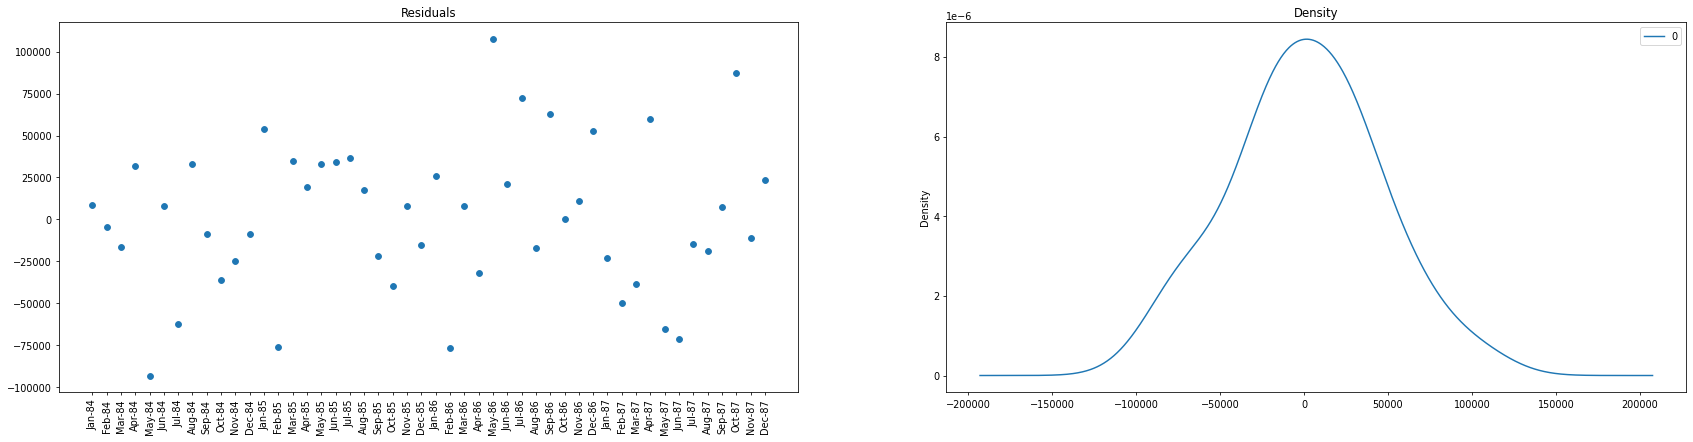

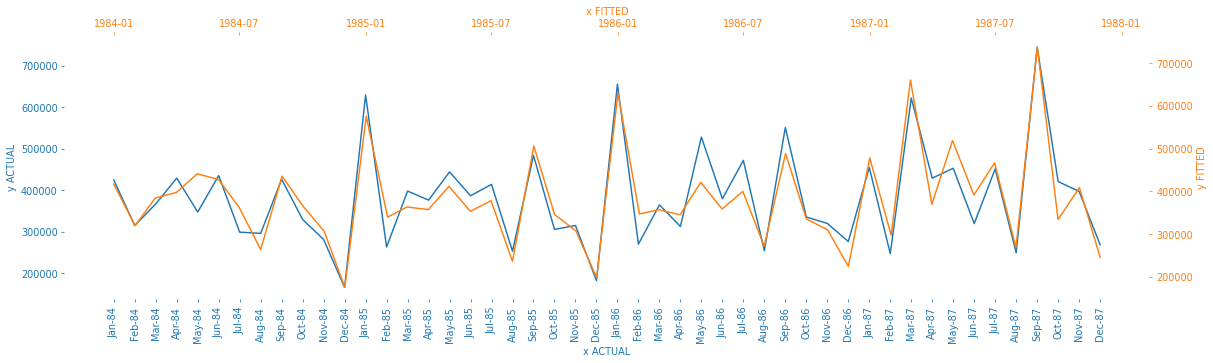

Mean Square Error (Actual vs Fitted):1914353081.104


In [11]:
# Plot residual errors
plt.rcParams.update({'figure.dpi':70})

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(30,7))
#residuals.plot(title="Residuals", ax=ax[0])
ax[0].set_title('Residuals');
ax[0].scatter(df.index,residuals)
ax[0].tick_params(axis='x', labelrotation = 90)
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted

fig=plt.figure(figsize=(20,5))

ax=fig.add_subplot(111, label="1",frame_on=False)
ax2=fig.add_subplot(111, label="2", frame_on=False)


ax.plot(df, color="C0")
ax.set_xlabel("x ACTUAL", color="C0")
ax.set_ylabel("y ACTUAL", color="C0")
ax.tick_params(axis='x', colors="C0", labelrotation = 90)
ax.tick_params(axis='y', colors="C0")


ax2.plot(model_fit.predict(dynamic=False), color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('x FITTED', color="C1") 
ax2.set_ylabel('y FITTED', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.show()

predictions = model_fit.predict(dynamic=False)
print ("Mean Square Error (Actual vs Fitted):%.3f" %(mean_squared_error(df, predictions)))


From the graphs above we can observe that the residuals:
    
   **- have a random distribution with no apparent auto-correlation or visible pattern**
   
   **- the residuals distribution seem to be normal centered at zero with**
   
   **- the fitted values almost match the actual values in the time series**
   
**We can conclude that the SARIMAX (1,0,1,12) with covariants is a good model for forecasting the sales time series in the Harmon Foods problem**